Jair Sánchez Sierra

<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy
from scipy.interpolate import lagrange

from scipy.constants import pi
from sympy import pi, oo, tan, symbols, integrate

#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [277]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])

i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

In [278]:
df = pd.DataFrame()
df["Tiempo(s)"] = t
df["Corriente (A)"] = i
df

,Tiempo(s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


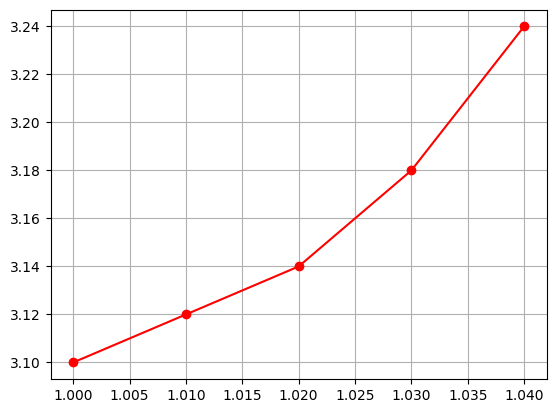

In [279]:
plt.plot(df["Tiempo(s)"],df["Corriente (A)"], "ro-" )
plt.grid()

In [280]:
derivada = np.gradient(i,t) #

# di = np.diff(i) diferencia de valores de i
# dt = np.diff(t)
# d=di/dt

In [281]:
L = 0.98

R = 0.142

E_t = L * derivada + R*i

df["fem(v)"] = E_t

df

,Tiempo(s),Corriente (A),fem(v)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


Text(0.5, 1.0, 'I vs T')

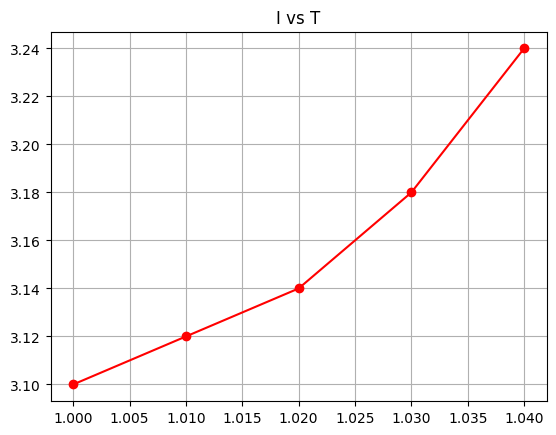

In [282]:
plt.plot(df["Tiempo(s)"],df["Corriente (A)"],"ro-")
plt.grid()
plt.title("I vs T")

In [283]:
pol= lagrange(t,df["Corriente (A)"])
h = 1e-6
x=np.linspace(1,1.04,100)

def derivada_I(pol,x,h):
  f_prima = (1 / (2*h)) * ((-3)* pol(x) + 4*pol(x+h)- pol(x + 2*h))
  return f_prima

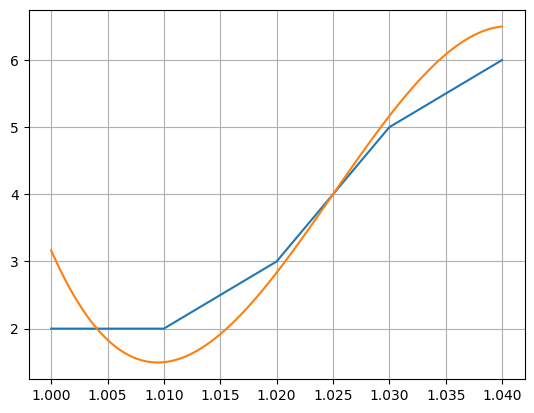

In [284]:
f=derivada_I(pol,x,h)
plt.plot(df["Tiempo(s)"],derivada)
plt.plot(x,f)
plt.grid()


##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [285]:
import scipy as sp

import matplotlib.pyplot as plt

In [286]:
# @title Metodo del trapecio

def integral_trapa(f, a, b, n):
  x = np.linspace(a, b, n)
  suma = 0
  for i in range(1, n, 1):
    suma = suma + f(x[i])
  I = ((b-a)/(2*n))* (f(a) + f(b) + 2*suma)
  return I

In [287]:
tan1 =lambda x: 1 / ((np.tan(x))**0.5)

a = 1e-9
b = np.pi/2
n = 1000000

print("Integral con metodo del trapecio =",integral_trapa(tan1,a,b,n))


I = sp.integrate.quad(tan1,a,b)
print("Integral con libreria =",I)


Integral con metodo del trapecio = 2.244444393911449
Integral con libreria = (2.22144146908185, 1.0970602204452007e-09)


In [288]:
# @title Metodo de simpson

In [289]:
# @title Metodo de cuadratura

In [290]:
import sympy as sp
from sympy import pi, oo, tan, symbols, integrate


In [291]:
# @title Primera integral
#Simbolicamente

x = symbols("x")
tan =  1 / ((sp.tan(x))**0.5)

I = integrate(tan, (x, 0, pi/2)).evalf()
I

2.22144146907918

In [292]:
# Metodo de trapecio




In [293]:
# @title Segunda integral
f = (sp.cos(x))/x**3
I = integrate(f,(x,1,oo)).evalf()
I

0.0181176219806057

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

In [294]:
# @title Tercera integral
y = symbols("y")

ff = 1 / sp.sqrt(1-(y**2))
I = integrate(ff, (y,0,sp.sin(x))).evalf()  #se evalua primero la parte de dy, porque simbolicamente el resultado esuna función que dependerá de x
I

II = integrate(I,(x,0, pi/4)).evalf()  #se evalua la función resultante de la integración anterioir en los limites de la variable x
print("Resultado de la integral con symbols : ",II)

Resultado de la integral con symbols :  0.308425137534042


In [295]:
pi**2/32

pi**2/32

## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [296]:
# 1) Los parametros iniciales que tomaremos serán:

I0 = 1  #Momento de inercia [kg*m^2]
theta = np.pi/4    #Angulo en radianes
l = 1  # Longitud del pendulo [m]
m = 1 # La masa en [kg]
g = 9.87  # Aceleracion gravitacional [m/s^2]


In [297]:
# 2) Calculo de la integral

def integral(phi):
  elip = 1 / np.sqrt(1 - k**2 * (np.sin(phi))**2)
  return elip

def integral_(k):
  N = 10000
  phi = np.linspace(0, np.pi/2, N)
  integrall = np.trapz(integral(phi),phi)  #hallamos la integral con el metodo del trapecio
  return integrall



In [298]:
# 3) Se calcula el periodo de oscilación
# suponemos a b muy pequeño que lo podemos ignorar al poder hallar P0 (dado que es para peueñas oscilaciones)

P_0 = 2 * np.pi * np.sqrt(I0 /(m  *g))

k = np.sin(theta/2) #tomamos este valor como parametro dado


P = (2 * P_0 / np.pi )* integral_(k)

print("Periodo de oscilación para pequeñas oscilaciones:", P_0, "s")
print("Periodo de oscilación para NO pequeñas oscilaciones (Metodo Trapecio):", P,"s")



Periodo de oscilación para pequeñas oscilaciones: 1.999959918655044 s
Periodo de oscilación para NO pequeñas oscilaciones (Metodo Trapecio): 2.079905002863294 s


In [299]:
#Esta libreria puede calcular la integral eliptica

from scipy.special import ellipk

P = 2 * P_0 / np.pi * ellipk(k**2)  #a ellipk solo se le da el valor del parametro de la integral eliptica, que en este caso es K^2
print("Este es el valor del periodo P, usando una libreria que lo calcula directamente :",P,"s")

Este es el valor del periodo P, usando una libreria que lo calcula directamente : 2.079905002863294 s


## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [300]:
# Coeficientes de la aproximación polinomial
eps = 3 * 10**-5
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729

def aprox_pol(m):
    m1 = 1 - m
    b_terminos = (b0+(b1*m1) + b2 * (m1 ** 2)) * np.log(m1)
    return a0+(a1 * m1) + a2 * (m1 ** 2) - b_terminos + eps

def aprox_num(m):
    integral = lambda phi: 1 / np.sqrt(1 - m * (np.sin(phi) ** 2))
    resultado, error = sc.integrate.quad(integral, 0, np.pi/2)
    return resultado



# Calcular los valores para diferentes valores de m
m  = np.linspace(0,0.99999999999, 10)
Resultado_pol = [aprox_pol(i) for i in m]
Resultado_num = [aprox_num(i) for i in m]


for i in range(len(Resultado_num)):
  print(f"Resultado polinomial = {Resultado_pol[i]} y Resultado numerico = {Resultado_num[i]}")

#Hay una division por cero cuando m toma valores muy cercanos a 1 e incluso el 1, Por eso lo coloqué hasta 0.99999999999


Resultado polinomial = 1.5055496599999998 y Resultado numerico = 1.5707963267948966
Resultado polinomial = 1.5658692208171585 y Resultado numerico = 1.6173867356242346
Resultado polinomial = 1.6315677761046081 y Resultado numerico = 1.6710043608207488
Resultado polinomial = 1.7049333148465917 y Resultado numerico = 1.733916885255877
Resultado polinomial = 1.789527028489491 y Resultado numerico = 1.809667495483234
Resultado polinomial = 1.891348004269479 y Resultado numerico = 1.9042414169396467
Resultado polinomial = 2.021723048280324 y Resultado numerico = 2.028959102740042
Resultado polinomial = 2.206307768018912 y Resultado numerico = 2.209483927337824
Resultado polinomial = 2.527876185205694 y Resultado numerico = 2.5286255321814184
Resultado polinomial = 14.050542370128923 y Resultado numerico = 14.05051186735126


# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [301]:
import scipy as sc
from scipy import integrate

In [302]:
#theta = np.pi/4
theta = np.linspace(0.1,np.pi/2,100)
r = np.linspace(0.1, 5, 100)
a = 1
m = 1  #u_0/4pi = 1
I = 3


In [303]:
def k_(r,a,theta):
  k = (4 * a * r * np.sin(theta)) / ((a**2)+(r**2)+(2*a*r*np.sin(theta)))
  return k

kk = k_(r,a, theta)
kk

array([0.03877151, 0.06485903, 0.09436292, 0.12634621, 0.15989426,
       0.19416876, 0.22844336, 0.26212128, 0.29473811, 0.32595375,
       0.35553774, 0.3833516 , 0.40933063, 0.43346697, 0.45579466,
       0.47637721, 0.49529766, 0.51265073, 0.52853703, 0.5430587 ,
       0.55631642, 0.56840734, 0.57942377, 0.58945239, 0.59857391,
       0.60686295, 0.61438816, 0.62121245, 0.6273933 , 0.63298309,
       0.63802949, 0.64257586, 0.64666157, 0.65032236, 0.65359069,
       0.65649603, 0.65906514, 0.66132232, 0.66328969, 0.66498734,
       0.66643356, 0.66764501, 0.66863688, 0.66942303, 0.6700161 ,
       0.67042766, 0.67066828, 0.67074765, 0.67067463, 0.67045737,
       0.67010333, 0.66961939, 0.66901186, 0.66828655, 0.66744882,
       0.66650361, 0.66545548, 0.66430865, 0.66306701, 0.66173417,
       0.66031347, 0.65880801, 0.65722065, 0.65555407, 0.65381075,
       0.65199298, 0.65010293, 0.64814258, 0.6461138 , 0.64401833,
       0.64185779, 0.63963371, 0.63734749, 0.63500047, 0.63259

In [304]:
def E_k(k):
  f = lambda phi: np.sqrt(1 - (k * (np.sin(phi))**2))
  I = integrate.quad(f, 0, np.pi/2)
  return I

E_ = np.zeros(100)
for i in range(len(kk)):
  E_[i] = E_k(kk[i])[0]
print(E_)


[1.55545828 1.54500782 1.53305727 1.51993836 1.50598591 1.49151862
 1.47682503 1.46215479 1.44771483 1.43366935 1.42014261 1.40722332
 1.39496984 1.38341549 1.37257363 1.36244216 1.3530074  1.34424732
 1.33613419 1.32863663 1.32172123 1.31535375 1.30950003 1.30412667
 1.2992014  1.29469346 1.29057372 1.28681481 1.28339113 1.28027882
 1.27745576 1.27490144 1.27259692 1.27052473 1.26866874 1.26701413
 1.26554724 1.2642555  1.26312736 1.26215217 1.26132016 1.26062232
 1.26005036 1.25959664 1.25925412 1.25901631 1.25887723 1.25883135
 1.25887357 1.25899915 1.25920372 1.25948326 1.25983399 1.26025244
 1.26073539 1.26127984 1.26188298 1.26254223 1.26325516 1.26401951
 1.26483319 1.26569421 1.26660075 1.26755108 1.26854358 1.26957673
 1.27064913 1.27175944 1.27290639 1.27408881 1.27530558 1.27655565
 1.27783803 1.27915178 1.28049601 1.28186989 1.2832726  1.28470341
 1.28616158 1.28764643 1.28915732 1.29069361 1.29225472 1.29384008
 1.29544915 1.2970814  1.29873635 1.3004135  1.30211241 1.3038

In [305]:
def K_k(k):
  f = lambda phi: 1 / (np.sqrt(1 - (k * (np.sin(phi))**2)))
  I = integrate.quad(f, 0, np.pi/2)
  return I

K_ = np.zeros(100)
for i in range(len(kk)):
  K_[i] = K_k(kk[i])[0]
print(K_)


[1.58636313 1.59723969 1.60995845 1.62428131 1.63994938 1.65669552
 1.67425539 1.6923765  1.71082475 1.72938891 1.74788296 1.7661469
 1.78404622 1.8014706  1.81833198 1.83456229 1.85011116 1.86494353
 1.87903744 1.89238194 1.90497517 1.91682277 1.92793632 1.93833208
 1.94802994 1.95705245 1.96542405 1.97317043 1.980318   1.98689347
 1.99292348 1.99843434 2.00345184 2.00800105 2.01210623 2.01579074
 2.01907698 2.02198635 2.02453928 2.02675518 2.02865246 2.0302486
 2.0315601  2.0326026  2.03339083 2.03393872 2.03425939 2.03436521
 2.03426785 2.03397829 2.03350689 2.0328634  2.03205701 2.03109639
 2.02998968 2.02874458 2.02736836 2.02586785 2.02424952 2.02251946
 2.02068343 2.01874687 2.01671494 2.01459249 2.01238414 2.01009423
 2.00772692 2.00528611 2.00277551 2.00019867 1.99755891 1.99485943
 1.99210325 1.98929325 1.98643216 1.98352259 1.98056704 1.97756787
 1.97452733 1.9714476  1.96833073 1.96517869 1.96199337 1.95877657
 1.95553002 1.95225536 1.94895419 1.94562802 1.94227831 1.938906

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

In [306]:
def Potencial(r, theta, k, K, E, m, I):
  A = m * (4 * I * a / np.sqrt((a**2)+(r**2)+(2*a*r*np.sin(theta)))) * (((2 - k)* K_ - 2 * E_)/ k)
  return A

AA = Potencial(r,theta, kk, K_, E_, m, I)
AA

array([0.09271384, 0.15628894, 0.22912342, 0.3090519 , 0.39382275,
       0.481234  , 0.56924245, 0.65604059, 0.74010128, 0.82019445,
       0.89538173, 0.96499554, 1.02860863, 1.08599909, 1.13711433,
       1.18203679, 1.22095262, 1.25412437, 1.28186777, 1.30453259,
       1.3224872 , 1.33610645, 1.34576236, 1.35181725, 1.35461879,
       1.35449664, 1.35176037, 1.34669833, 1.33957728, 1.33064256,
       1.32011869, 1.30821022, 1.29510281, 1.28096436, 1.26594628,
       1.25018468, 1.23380162, 1.2169063 , 1.19959614, 1.18195792,
       1.1640687 , 1.14599682, 1.12780269, 1.10953963, 1.09125455,
       1.07298864, 1.05477794, 1.03665387, 1.01864376, 1.00077127,
       0.98305677, 0.96551772, 0.94816898, 0.9310231 , 0.91409059,
       0.89738013, 0.88089881, 0.86465225, 0.84864487, 0.83287994,
       0.81735974, 0.80208574, 0.7870586 , 0.77227835, 0.75774442,
       0.74345577, 0.72941089, 0.71560791, 0.70204463, 0.68871856,
       0.67562699, 0.66276701, 0.65013554, 0.63772934, 0.62554

In [307]:
import matplotlib.pyplot as plt

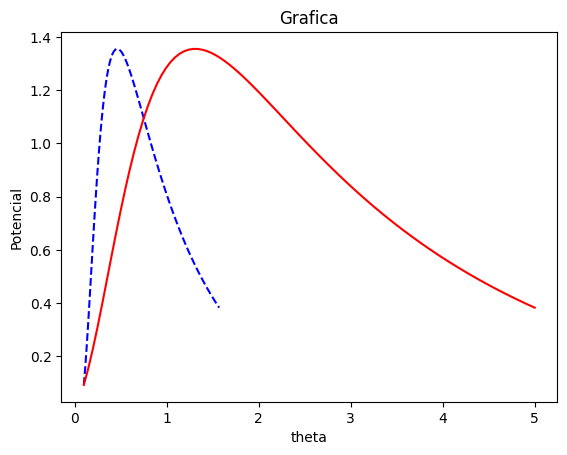

In [308]:

plt.xlabel("theta")
plt.ylabel("Potencial")
plt.title("Grafica")
plt.plot(theta, AA, "b--")
plt.plot(r, AA, "r-")
plt.show()